This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

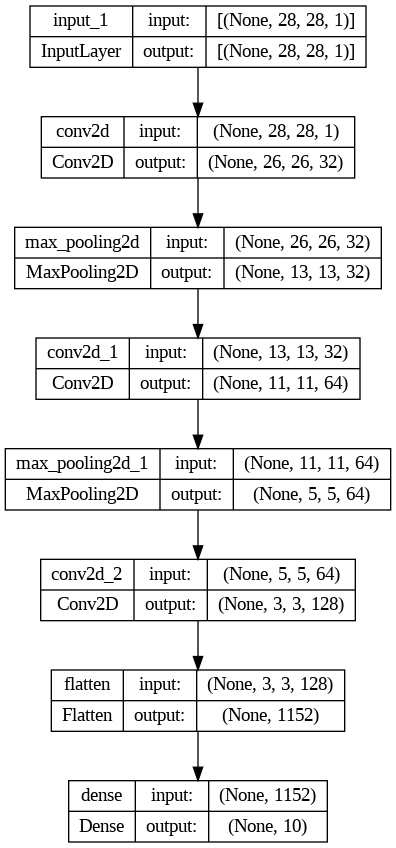

In [ ]:
#shows the architecture of the model
from keras.utils import plot_model
plot_model(model,show_shapes=True)

**Displaying the model's summary**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**Training the convnet on MNIST images**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
 93/938 [=>............................] - ETA: 50s - loss: 0.6840 - accuracy: 0.7949

KeyboardInterrupt: 

**Evaluating the convnet**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

# Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

Will work on a cat vs dog dataset for classification problem

### Downloading the data
This data set is not packaged with keras. We will use kaggle API to download the dataset in colab

In [ ]:

#uploading the downloaded file from local machine
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abeerrahman","key":"1b7b4e9cf37e962f5f901afa3cacc428"}'}

In [ ]:
#creating a kaggle folder,folder already exists,no need to create
#!mkdir ~/.kaggle
#list of directories
!ls -la ~/
#navigating the directory
!ls -la ~/.kaggle

#moving the file to kaggle directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#verify kaggle setup
!kaggle datasets list


total 68
drwx------ 1 root root 4096 Jul 18 04:49 .
drwxr-xr-x 1 root root 4096 Jul 18 04:49 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Jul 16 13:41 .cache
drwx------ 4 root root 4096 Jul 16 13:41 .config
drwxr-xr-x 5 root root 4096 Jul 16 13:40 .ipython
drwx------ 1 root root 4096 Jul 16 13:40 .jupyter
drwxr-xr-x 2 root root 4096 Jul 18 04:49 .keras
drwx------ 3 root root 4096 Jul 16 13:15 .launchpadlib
drwxr-xr-x 1 root root 4096 Jul 16 13:40 .local
drwxr-xr-x 4 root root 4096 Jul 16 13:41 .npm
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  211 Jul 16 13:40 .wget-hsts
ls: cannot access '/root/.kaggle': No such file or directory
ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------

In [ ]:

!kaggle competitions download -c dogs-vs-cats


 99% 801M/812M [00:11<00:00, 50.6MB/s]
100% 812M/812M [00:11<00:00, 73.1MB/s]


**Unzipping the data**

In [ ]:
!unzip -qq dogs-vs-cats.zip


In [ ]:
!unzip -qq train.zip

In [ ]:
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          16124        338  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          12104        257  1.0              
ihelon/coffee-sales                                                 Coffee Sales                                         10KB  2024-07-03 20:04:43           4052         71  1.0              
oleksiimartusiuk/bts-january-2024-commer

**Copying images to training, validation, and test directories**

This dataset contains 25,000 images of dogs and cats ((12,500 from each class)

we’ll create a new dataset containing three subsets:

i. a training set with 1,000 samples of each class

ii. a validation set with 500 samples of each class

iii. a test set with 1,000 samples

In [ ]:

import os, shutil, pathlib
#shutil is the standard python lib for copying and removing files and directories
#pathlib is a python standard library module that provides an object-oriented approach to handling and manipulating filesystem paths

#Path to the directory where the original dataset was uncompressed
original_dir = pathlib.Path("train")
#Directory where we will store our smaller dataset
new_base_dir = pathlib.Path("cats_vs_dogs_small")

#!ls -la ~/.kaggle

#Creating a subset of the dataset for training, validation, or testing.
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        #creates a path for the subset directory.
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True) #creates the directory, and does not raise an exception if the directory already exists
        #Generating a list of filenames for the specified range.
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        #copying each file from the original directory to the new subset directory.
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
'''
The model expects RGB images of size 180 × 180.Each image has 3 channels(R,G,B)
Intensity of each channel will be represented by a 180x180 matrix with integes
raninging from 0 to 255

'''
inputs = keras.Input(shape=(180, 180, 3))
#Rescaling inputs to the [0, 1] range by dividing them by 255.
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
#binary classification problem (cat/dog)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
#NO REPEAT
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

Data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the model. Currently, the data sits on a drive as JPEG files

**Using `image_dataset_from_directory` to read images**

Keras features the utility function image_dataset_from_ directory(), which lets you quickly set up a data pipeline that can automatically turn image files on disk into batches of preprocessed tensors.

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
#list the subdirectories of directory and assume each one contains images from one of our classes.
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


#**Tensorflow dataset object**

TensorFlow makes available the tf.data API to create efficient input pipelines for machine learning models






In [ ]:
#crearting Dataset from varoius data sources,such as arrays, tensors, and files.
import numpy as np
import tensorflow as tf
#We’ll consider 1,000 samples, where each sample is a vector of size 16
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
print(dataset.snapshot)
#Each element of the dataset corresponds to one row (or slice) of the array.
#In this case, each element will be a 1D array of length 16.

<bound method DatasetV2.snapshot of <_TensorSliceDataset element_spec=TensorSpec(shape=(16,), dtype=tf.float64, name=None)>>


In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
#batch method to match the data
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
#reshape the elements in our toy dataset from shape (16,) to shape (4, 4)
#Did not understand the lambda part
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


##**Fitting the model using a `Dataset`**

We’ll use the validation_data argument in fit() to monitor validation metrics on a separate Dataset object

we’ll also use a ModelCheckpoint callback to save the model after each epoch. We’ll configure it with the path specifying where to save the file, as well as the arguments save_best_only=True and monitor="val_loss"

The arguments tell the callback to only save a new file (overwriting any previous one) when the current value of the val_loss metric is lower than at any previous time during training

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10, #originally 30, made it 5 to do it in short runtime
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - ETA: 0s - loss: 0.7019 - accuracy: 0.5150

#Testing:Finding the best model

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history1 = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/5
63/63 [==============================] - 222s 4s/step - loss: 0.6946 - accuracy: 0.5340 - val_loss: 0.6940 - val_accuracy: 0.5050
Epoch 2/5
63/63 [==============================] - 214s 3s/step - loss: 0.6822 - accuracy: 0.5820 - val_loss: 0.6675 - val_accuracy: 0.5930
Epoch 3/5
63/63 [==============================] - 219s 3s/step - loss: 0.6562 - accuracy: 0.6355 - val_loss: 0.6410 - val_accuracy: 0.6320
Epoch 4/5
63/63 [==============================] - 221s 4s/step - loss: 0.5990 - accuracy: 0.6890 - val_loss: 0.6241 - val_accuracy: 0.6430
Epoch 5/5
63/63 [==============================] - 229s 4s/step - loss: 0.5717 - accuracy: 0.7090 - val_loss: 1.0451 - val_accuracy: 0.5330


In [ ]:
model.weights

[<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[ 1.11736491e-01, -5.04161380e-02,  7.00760707e-02,
           -9.98908505e-02,  1.42378241e-01, -8.39463845e-02,
            6.23541735e-02,  2.30379459e-02, -1.02486081e-01,
           -6.34326264e-02,  2.79947165e-02, -8.94953236e-02,
           -2.60334946e-02,  6.81492314e-02, -1.16483666e-01,
            7.47777596e-02, -5.87906279e-02, -7.50803575e-02,
           -2.79354807e-02, -6.15504570e-02,  8.25991333e-02,
            1.14925042e-01, -1.15160868e-01,  1.26000628e-01,
            1.06197931e-01,  9.71560404e-02,  3.60177420e-02,
           -1.19721599e-01, -2.88427388e-03,  2.44951565e-02,
            7.39693549e-03,  8.81891348e-04],
          [-7.39294663e-02, -1.31389037e-01,  7.95317367e-02,
           -3.74246277e-02,  5.17907143e-02, -9.82141197e-02,
            8.58803466e-02, -1.05882876e-01,  1.13575377e-01,
           -9.58728120e-02, -6.90811127e-03, -2.51472518e-02,
          

In [ ]:
#loading the best model
best_model = keras.models.load_model("convnet_from_scratch.keras")
#summary of the model
best_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

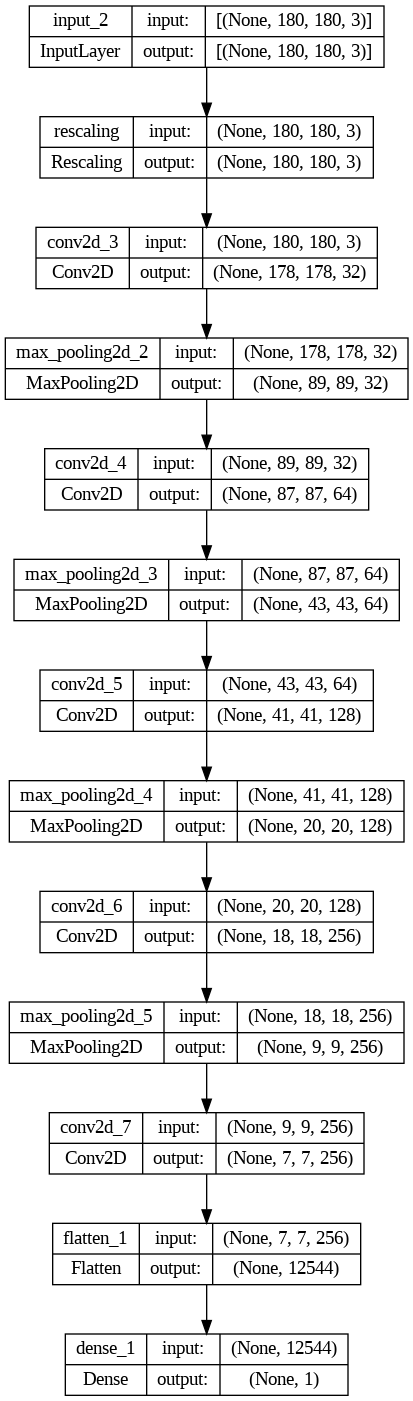

In [ ]:
#visualizing the model architecture
from keras.utils import plot_model
plot_model(best_model,show_shapes=True,show_layer_names=True)

In [ ]:
#weights of the best_model are fixed
best_model.weights


[<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[ 1.17394872e-01, -5.17432429e-02,  6.98094368e-02,
           -9.79422480e-02,  1.45034790e-01, -8.00226033e-02,
            5.94156571e-02,  2.33188737e-02, -1.02486134e-01,
           -6.19561486e-02,  1.91531274e-02, -8.55811536e-02,
           -2.50801556e-02,  7.34405369e-02, -1.19284302e-01,
            7.33215436e-02, -5.89629672e-02, -7.26138949e-02,
           -3.26679274e-02, -6.31660372e-02,  8.26347247e-02,
            1.14564389e-01, -1.12985425e-01,  1.24131009e-01,
            1.03419825e-01,  9.69738588e-02,  4.06598635e-02,
           -1.18421398e-01, -5.77994715e-03,  2.49317307e-02,
            5.44098113e-03, -2.95940414e-03],
          [-6.78078979e-02, -1.33378968e-01,  8.21649656e-02,
           -3.51478904e-02,  5.67230918e-02, -9.37016457e-02,
            8.37252364e-02, -1.06084637e-01,  1.13576055e-01,
           -9.53610018e-02, -1.48144290e-02, -1.89436171e-02,
          

#**Displaying curves of loss and accuracy during training**

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 63s 994ms/step - loss: 0.6334 - accuracy: 0.6295
Test accuracy: 0.629


### Using data augmentation

Data augmentation takes the approach of generating more training data from existing training samples by augmenting the samples via a number of random transformations that yield believable-looking images.

The goal is that, at training time, the  model will never see the exact same picture twice. This helps expose the model to more aspects of the data so it can generalize better.

##**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),#flips 50% of images that go through it
        layers.RandomRotation(0.1), #rotates the input images by a random value in the range [–10%, +10%]
        layers.RandomZoom(0.2),
    ]
)

##**Displaying some randomly augmented training images**

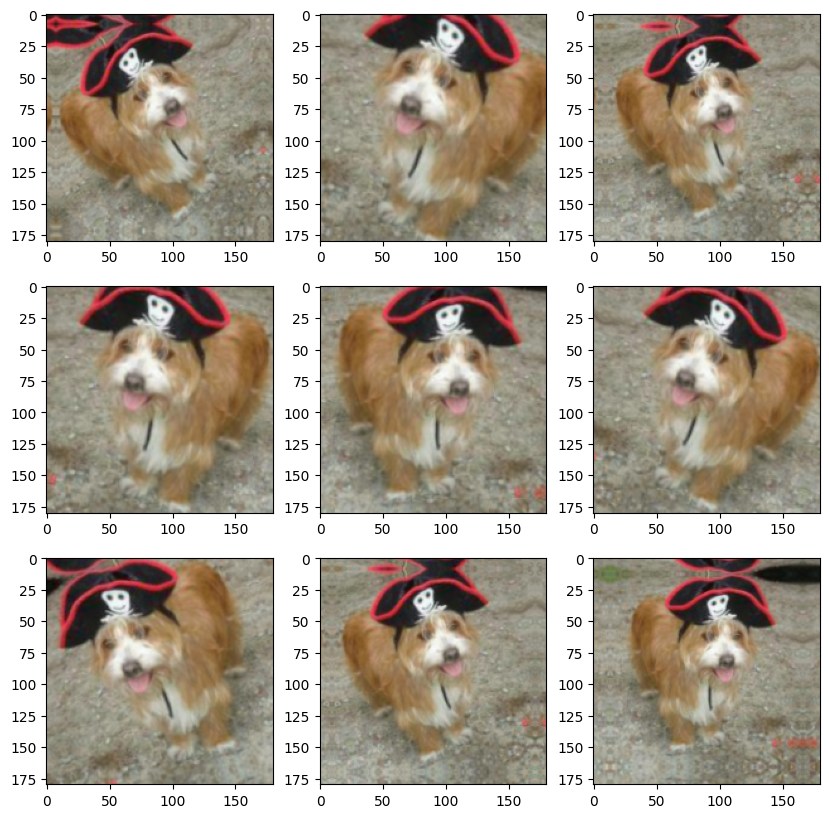

In [ ]:
plt.figure(figsize=(10, 10))
#Extracts a single batch from dataset
#The batch contains images and labels
for images, _ in train_dataset.take(1):
#creates 9 subplots
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        #plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
#Data augmentation
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#Flattening
x = layers.Flatten()(x)
#Dropout before dense layer
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=2, # 100
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/2
14/63 [=====>........................] - ETA: 2:58 - loss: 0.6901 - accuracy: 0.5603

KeyboardInterrupt: 

In [ ]:
#Visualization of accuracy after data augmaention and regularization(Dropout)
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Leveraging a pretrained model

A common and highly effective approach to deep learning on small image datasets is to use a pretrained model. A pretarined model is the one that has been trained on a large scale dataset

We will consider a large convnet trained on the ImageNet dataset (1.4 million labeled images and 1,000 different classes)

We’ll use the VGG16 architecture

There are two ways to use a pretrained model:
1. feature extraction
2. fine-tuning.

### Feature extraction with a pretrained model

1. Use the representations learned by a previously trained model to extract interesting features from new samples.These features are then run through a new classifier, which is trained from scratch.

2. There are two ways to use a pretrained model: feature extraction and fine-tuning.

3. Convnets used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely connected classifier.

4.The first part is called the convolutional base of the model. In the case of convnets, feature extraction consists of taking the convolutional base of a previously trained network, running the new data through it, and training a new classifier on top of the output.



**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False, #densely connected layer not included
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

The final feature map has shape (5, 5, 512). That’s the feature map on top of which we’ll stick a densely connected classifier.There are two ways we can do that:

i.Fast feature extraction without data augmentation

ii.Feature extraction together with data augmentation



#### Fast feature extraction without data augmentation

##**Extracting the VGG16 features and corresponding labels**

1.Call the predict() method of the conv_base model on our training, validation, and testing datasets.

2.Extract features as NumPy arrays

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        #scales pixel values to an appropriate range
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        #predict() only expects images
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 25ms/step


In [ ]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 19.1381 - accuracy: 0.9320 - val_loss: 3.2358 - val_accuracy: 0.9710
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 5.7755 - accuracy: 0.9665 - val_loss: 3.8480 - val_accuracy: 0.9720
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 1.5023 - accuracy: 0.9895 - val_loss: 5.6236 - val_accuracy: 0.9710
Epoch 4/20
63/63 [==============================] - 1s 13ms/step - loss: 2.4037 - accuracy: 0.9870 - val_loss: 5.7520 - val_accuracy: 0.9710
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5024 - accuracy: 0.9895 - val_loss: 8.3338 - val_accuracy: 0.9640
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.6125 - accuracy: 0.9940 - val_loss: 5.3762 - val_accuracy: 0.9770
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1098 - accuracy: 0.9920 - val_loss: 5.1639 - val_accuracy: 0.9740
Epoch 8/20
63

**Plotting the results**

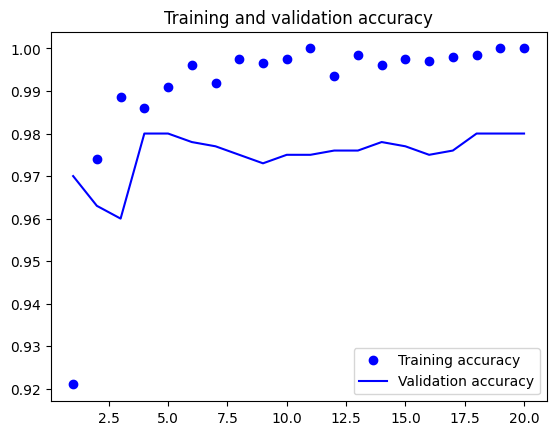

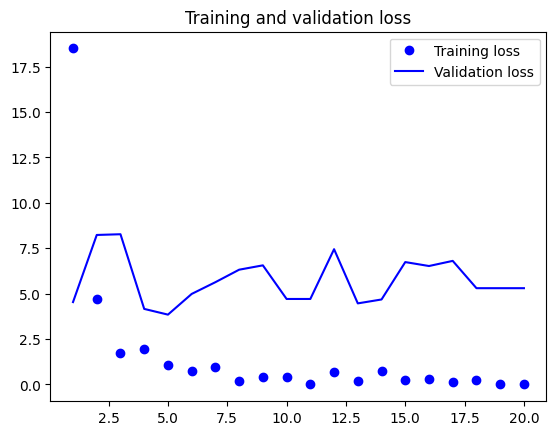

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
import keras
from keras import layers
import tensorflow as tf
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 2712.6079 - accuracy: 0.5030

TypeError: Cannot serialize object Ellipsis of type <class 'ellipsis'>. To be serializable, a class must implement the `get_config()` method.

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Fine-tuning a pretrained model

1. Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction

2. It’s only possible to fine-tune the top layers of the convolutional base once the classifier on top has already been trained.

3. If the classifier isn’t already trained, the error signal propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed

4. We are fine-tuning specialized features, early layers of convnet are more generic and reuseable features

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False


In [ ]:
train_dataset.element_spec

(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.4995

TypeError: Cannot serialize object Ellipsis of type <class 'ellipsis'>. To be serializable, a class must implement the `get_config()` method.

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Summary